# MACHINE LEARNING PREDICTION MODEL

# Volcano Eruptions triggered by seismic activity

In order to predict if an eruption will occur after an earthquake, we need to work between 3 datasets. 
The first one contains data of all world-wide eruptions that have been registered. The problem is that it lacks the location of the volcanos, that is why we need a second dataset containing all the volcanos of the world with it's location and some of their properties. Luckily, both datasets have a "Volcano ID" which helps us to relate them.     
Having this two datasets merged, we are going to do a new merge with the earthquake dataset so we can identify what kind of seismic activity triggers volcanoes. 

In [172]:
import pandas as pd
import numpy as np
import datetime as dt
import sklearn


In [173]:
erup= pd.read_csv('G:\Mi unidad\Henry\Data Science\Henry Labs\Seismic-Alert-System2\Seismic-Alert-System\Data Extraction and Transformation\Datasets\Output\Eruptions-Database.csv')

erup

,Volcano ID,volcano_name,eruption_number,eruption_category,Start Date,End Date,vei,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,2020-03-23,2020-04-02,NaN,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,2020-02-22,2020-02-22,NaN,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,2020-02-10,2020-04-06,NaN,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,2020-01-31,2020-04-17,NaN,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,2020-01-12,2020-01-12,NaN,-0.370,-91.550
...,...,...,...,...,...,...,...,...,...
11173,324020,Craters of the Moon,21101,Confirmed Eruption,NaN,NaN,0.0,43.420,-113.500
11174,222161,Igwisi Hills,22141,Confirmed Eruption,NaN,NaN,1.0,-4.889,31.933
11175,357121,Quetrupillan,22351,Confirmed Eruption,NaN,NaN,3.0,-39.496,-71.722
11176,357121,Quetrupillan,22352,Confirmed Eruption,NaN,NaN,3.0,-39.496,-71.722


In [174]:
# drop values with no start date:

erup = erup[erup['Start Date'].notna()]

In [175]:
erup.columns

Index(['Volcano ID', 'volcano_name', 'eruption_number', 'eruption_category',
       'Start Date', 'End Date', 'vei', 'latitude', 'longitude'],
      dtype='object')

In [176]:
# Drop of innecesary columns:

erup = erup.drop(columns=['volcano_name',
                          'eruption_number', 
                          'eruption_category',
                          'End Date', 
                          'vei',], axis=1)

In [177]:
erup

,Volcano ID,Start Date,latitude,longitude
0,266030,2020-03-23,1.112,124.737
1,343100,2020-02-22,13.434,-88.269
2,233020,2020-02-10,-21.244,55.708
3,345020,2020-01-31,10.830,-85.324
4,353010,2020-01-12,-0.370,-91.550
...,...,...,...,...
6932,263250,1678-08-19,-7.540,110.446
6934,282080,1678-03-01,31.593,130.657
6935,282090,1678-03-01,31.934,130.862
6936,283260,1678-02-22,39.964,140.757


In [178]:
# We import the volcanos dataset

volc = pd.read_csv('G:\Mi unidad\Henry\Data Science\Henry Labs\Seismic-Alert-System2\Seismic-Alert-System\Data Extraction and Transformation\Datasets\Output\Volcano-Database.csv')
volc

,Volcano ID,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,0,70,4019,393303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,300242,Zimina,Stratovolcano(es),Unknown,Russia,Kamchatka and Mainland Asia,Kamchatka Peninsula,55.862,160.603,3057,0,0,77,11184
954,341061,Zitacuaro-Valle de Bravo,Caldera,-3050,Mexico,México and Central America,Mexico,19.400,-100.250,3500,231977,231977,490440,4838069
955,221020,Zubair Group,Shield,2013,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,15.050,42.180,191,7,7,7,671171
956,221021,Zukur,Shield,Unknown,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,14.020,42.750,624,508,922,1075,1472800


In [179]:
volc.columns

Index(['Volcano ID', 'volcano_name', 'primary_volcano_type',
       'last_eruption_year', 'country', 'region', 'subregion', 'latitude',
       'longitude', 'elevation', 'population_within_5_km',
       'population_within_10_km', 'population_within_30_km',
       'population_within_100_km'],
      dtype='object')

In [180]:
# The only information from this dataset we are interested is the volcano ID and it's location (coordinates and country). 
# We drop the rest of the columns 

volc = volc.drop( columns=['volcano_name', 
                           'primary_volcano_type',
                           'last_eruption_year', 
                           'region', 
                           'subregion',  
                           'elevation', 
                           'latitude', 
                           'longitude',
                           'population_within_5_km',
                            'population_within_10_km', 
                            'population_within_30_km',
                            'population_within_100_km'], axis=1)


In [181]:
volc


,Volcano ID,country
0,283001,Japan
1,355096,Chile
2,342080,Guatemala
3,213004,Turkey
4,321040,United States
...,...,...
953,300242,Russia
954,341061,Mexico
955,221020,Yemen
956,221021,Yemen


Merging of both datasets based on Volcano ID into one 'eruptions' dataframe:

In [182]:
eruptions = pd.merge(erup, volc, on='Volcano ID')

eruptions

,Volcano ID,Start Date,latitude,longitude,country
0,266030,2020-03-23,1.112,124.737,Indonesia
1,266030,2018-10-02,1.112,124.737,Indonesia
2,266030,2016-01-02,1.112,124.737,Indonesia
3,266030,2015-01-06,1.112,124.737,Indonesia
4,266030,2012-08-26,1.112,124.737,Indonesia
...,...,...,...,...,...
4025,285010,1741-08-18,41.510,139.367,Japan
4026,357072,1751-12-31,-37.144,-70.033,Argentina
4027,374010,1727-08-03,64.050,-16.633,Iceland
4028,305030,1720-01-14,48.720,126.120,China


In [183]:
# We are only interested on eruptions that occurred in Japan, United States and Chile:

eruptions = eruptions.loc[(eruptions['country']=='Chile') | (eruptions['country']=='United States') | (eruptions['country']=='Japan')]

eruptions.sort_values(by=['Start Date'])

,Volcano ID,Start Date,latitude,longitude,country
3082,283260,1678-02-22,39.964,140.757,Japan
1168,282090,1678-03-01,31.934,130.862,Japan
1325,282080,1678-03-01,31.593,130.657,Japan
3280,284010,1684-02-14,34.724,139.394,Japan
3874,283240,1686-03-26,39.853,141.001,Japan
...,...,...,...,...,...
439,311360,2019-07-23,54.756,-163.970,United States
331,283110,2019-08-07,36.406,138.523,Japan
253,282060,2019-11-02,30.793,130.305,Japan
249,311060,2019-12-07,51.930,179.580,United States


In [184]:
eruptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 197 to 4025
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Volcano ID  1220 non-null   int64  
 1   Start Date  1220 non-null   object 
 2   latitude    1220 non-null   float64
 3   longitude   1220 non-null   float64
 4   country     1220 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 57.2+ KB


In [185]:
# Change dtype of date colums to datetime:

eruptions['Start Date'] = pd.to_datetime(eruptions['Start Date'])
eruptions

C:\Users\ariel\AppData\Local\Temp\ipykernel_19592\2512051396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eruptions['Start Date'] = pd.to_datetime(eruptions['Start Date'])


,Volcano ID,Start Date,latitude,longitude,country
197,282050,2020-01-11,30.443,130.217,Japan
198,282050,2018-10-21,30.443,130.217,Japan
199,282050,2015-05-29,30.443,130.217,Japan
200,282050,2014-08-03,30.443,130.217,Japan
201,282050,1980-09-28,30.443,130.217,Japan
...,...,...,...,...,...
4008,311350,1826-10-11,54.650,-164.430,United States
4020,311080,1791-06-07,51.885,-178.146,United States
4021,284060,1780-07-27,32.458,139.759,Japan
4024,285010,1759-08-19,41.510,139.367,Japan


In [186]:
# Also, for this analysis we are going to keep registries that are from 1960 or after because this data it's considered to be more reliable:

eruptions = eruptions[eruptions['Start Date'].dt.year >= 1960]

eruptions

,Volcano ID,Start Date,latitude,longitude,country
197,282050,2020-01-11,30.443,130.217,Japan
198,282050,2018-10-21,30.443,130.217,Japan
199,282050,2015-05-29,30.443,130.217,Japan
200,282050,2014-08-03,30.443,130.217,Japan
201,282050,1980-09-28,30.443,130.217,Japan
...,...,...,...,...,...
3680,284140,1967-03-27,20.546,144.893,United States
3695,283150,1963-11-20,37.125,139.963,Japan
3696,283150,1963-07-10,37.125,139.963,Japan
3697,283150,1960-10-10,37.125,139.963,Japan


Now we are interested on knowing if an earthquake provoked an eruption. According to scientific analysis, a good time window between the two events is 10 days

In [187]:
from urllib.request import urlopen
import json
import db_dtypes

from google.cloud import bigquery
from google.oauth2 import service_account

In [188]:
# Import 'earthquake_deduped' data from our database in Google BigQuery:

project_id = 'seismic-alert-system'

credentials = service_account.Credentials.from_service_account_file('G:\Mi unidad\Henry\Data Science\Henry Labs\seismic-alert-system-cbd570f67095.json')
client = bigquery.Client(project=project_id, location='southamerica-east1', credentials=credentials)

In [189]:
# Get the table from BigQuery
table = client.get_table("seismic-alert-system.seismic_datawarehouse.earthquake_deduped")

In [190]:
# Convert it to dataframe

eartqk = client.list_rows(table).to_dataframe()

In [191]:
eartqk

,time,place,mag,magType,depth,latitude,longitude
0,1982-09-30 05:43:12.040,"123 km NW of Valparaíso, Chile",NaN,None,33.0,-32.235,-72.54
1,1978-01-25 18:57:32.600,"32 km SE of It?, Japan",NaN,None,10.0,34.748,139.321
2,1998-09-05 03:58:30.530,"24 km W of Rancagua, Chile",NaN,None,68.8,-34.139,-71.004
3,1997-08-11 07:29:00.830,"62 km SE of Puente Alto, Chile",NaN,None,10.0,-33.94,-70.021
4,1995-02-24 13:10:05.150,"68 km E of Vallenar, Chile",NaN,None,211.1,-28.593,-70.06
...,...,...,...,...,...,...,...
84744,2019-09-29 15:57:53.236,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.163
84745,2011-06-22 21:50:52.350,"41 km NNE of Miyako, Japan",6.7,mww,33.0,39.955,142.205
84746,2012-04-17 03:50:15.610,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.625,-71.365
84747,2011-01-02 20:20:17.780,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [192]:
# We are interested on the data that has not null magnitude data

eartqk= eartqk[eartqk['mag'].notna()]

In [193]:
eartqk['mag'].isna().sum()

0

In [194]:
eartqk.sort_values('time')

,time,place,mag,magType,depth,latitude,longitude
78103,1920-08-20 16:15:42.640,"19 km SW of Angol, Chile",6.95,mw,15.000,-37.911,-72.887
77399,1920-10-22 12:09:55.010,"152 km WNW of Tocopilla, Chile",6.59,mw,15.000,-21.602,-71.579
77155,1920-12-10 04:25:49.770,"50 km SSW of Carahue, Chile",7.29,mw,25.000,-39.102,-73.462
77338,1922-03-12 16:51:54.650,"72 km SW of Carahue, Chile",6.56,mw,35.000,-39.205,-73.714
77539,1922-05-21 15:40:42.150,"187 km NW of Constitución, Chile",6.10,mw,15.000,-34.101,-73.819
...,...,...,...,...,...,...,...
43042,2022-12-08 05:05:30.932,"98 km NW of San Antonio de los Cobres, Argentina",4.40,mb,246.482,-23.5673,-66.9759
56742,2022-12-08 05:22:57.120,"6km WNW of Cobb, CA",0.69,md,1.990,38.8370018,-122.7946701
67204,2022-12-08 05:27:47.170,"8km NW of The Geysers, CA",1.04,md,2.190,38.8258324,-122.8308334
64142,2022-12-08 05:49:17.300,"28 km E of Honaunau-Napoopoo, Hawaii",2.10,md,-1.660,19.4778327941895,-155.59033203125


In [195]:
# We will filter this with year +1960:

eartqk = eartqk[eartqk['time'].dt.year >= 1960]

In [196]:
# In order to do a merge with the eruptions dataframe, the date format must match. 
# We will first convert the datetime into a string with the desired format and then reconvert it to a datetime dtype. 

eartqk['time']=(eartqk['time']).dt.strftime('%Y-%m-%d')

In [197]:
eartqk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72778 entries, 11830 to 84748
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       72778 non-null  object 
 1   place      72778 non-null  object 
 2   mag        72778 non-null  float64
 3   magType    71687 non-null  object 
 4   depth      72778 non-null  float64
 5   latitude   72778 non-null  object 
 6   longitude  72778 non-null  object 
dtypes: float64(2), object(5)
memory usage: 4.4+ MB


In [198]:
eartqk['time']=pd.to_datetime(eartqk['time'], format='%Y-%m-%d')
eartqk

,time,place,mag,magType,depth,latitude,longitude
11830,2003-04-30,"89 km E of Iwaki, Japan",0.0,None,33.0,37.015,141.89
11831,2007-06-23,"188 km SSE of Shimoda, Japan",0.0,None,10.0,33.028,139.44
11832,2003-07-15,"Izu Islands, Japan region",0.0,None,33.0,31.574,141.68
11833,2004-06-02,"165 km SE of Katsuura, Japan",0.0,None,17.3,34.202,141.707
11834,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.596,-71.499
...,...,...,...,...,...,...,...
84744,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.163
84745,2011-06-22,"41 km NNE of Miyako, Japan",6.7,mww,33.0,39.955,142.205
84746,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.625,-71.365
84747,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [199]:
eruptions

,Volcano ID,Start Date,latitude,longitude,country
197,282050,2020-01-11,30.443,130.217,Japan
198,282050,2018-10-21,30.443,130.217,Japan
199,282050,2015-05-29,30.443,130.217,Japan
200,282050,2014-08-03,30.443,130.217,Japan
201,282050,1980-09-28,30.443,130.217,Japan
...,...,...,...,...,...
3680,284140,1967-03-27,20.546,144.893,United States
3695,283150,1963-11-20,37.125,139.963,Japan
3696,283150,1963-07-10,37.125,139.963,Japan
3697,283150,1960-10-10,37.125,139.963,Japan


In [200]:
# We need to implement a mechanism where we can relate an eruption event with an earthquake that occurred at maximum 10 days earlier. 
# For this, we create columns that specifies the previous days 

for i in range (1,11):
        
    eruptions['time_'+ (str(i))]= ((eruptions['Start Date']) - dt.timedelta(days=i))

eruptions

C:\Users\ariel\AppData\Local\Temp\ipykernel_19592\2090104725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eruptions['time_'+ (str(i))]= ((eruptions['Start Date']) - dt.timedelta(days=i))
C:\Users\ariel\AppData\Local\Temp\ipykernel_19592\2090104725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eruptions['time_'+ (str(i))]= ((eruptions['Start Date']) - dt.timedelta(days=i))
C:\Users\ariel\AppData\Local\Temp\ipykernel_19592\2090104725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a

,Volcano ID,Start Date,latitude,longitude,country,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10
197,282050,2020-01-11,30.443,130.217,Japan,2020-01-10,2020-01-09,2020-01-08,2020-01-07,2020-01-06,2020-01-05,2020-01-04,2020-01-03,2020-01-02,2020-01-01
198,282050,2018-10-21,30.443,130.217,Japan,2018-10-20,2018-10-19,2018-10-18,2018-10-17,2018-10-16,2018-10-15,2018-10-14,2018-10-13,2018-10-12,2018-10-11
199,282050,2015-05-29,30.443,130.217,Japan,2015-05-28,2015-05-27,2015-05-26,2015-05-25,2015-05-24,2015-05-23,2015-05-22,2015-05-21,2015-05-20,2015-05-19
200,282050,2014-08-03,30.443,130.217,Japan,2014-08-02,2014-08-01,2014-07-31,2014-07-30,2014-07-29,2014-07-28,2014-07-27,2014-07-26,2014-07-25,2014-07-24
201,282050,1980-09-28,30.443,130.217,Japan,1980-09-27,1980-09-26,1980-09-25,1980-09-24,1980-09-23,1980-09-22,1980-09-21,1980-09-20,1980-09-19,1980-09-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,284140,1967-03-27,20.546,144.893,United States,1967-03-26,1967-03-25,1967-03-24,1967-03-23,1967-03-22,1967-03-21,1967-03-20,1967-03-19,1967-03-18,1967-03-17
3695,283150,1963-11-20,37.125,139.963,Japan,1963-11-19,1963-11-18,1963-11-17,1963-11-16,1963-11-15,1963-11-14,1963-11-13,1963-11-12,1963-11-11,1963-11-10
3696,283150,1963-07-10,37.125,139.963,Japan,1963-07-09,1963-07-08,1963-07-07,1963-07-06,1963-07-05,1963-07-04,1963-07-03,1963-07-02,1963-07-01,1963-06-30
3697,283150,1960-10-10,37.125,139.963,Japan,1960-10-09,1960-10-08,1960-10-07,1960-10-06,1960-10-05,1960-10-04,1960-10-03,1960-10-02,1960-10-01,1960-09-30


In [201]:
#eruptions.sort_values('Start Date')

eruptions.sort_index()

,Volcano ID,Start Date,latitude,longitude,country,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10
197,282050,2020-01-11,30.443,130.217,Japan,2020-01-10,2020-01-09,2020-01-08,2020-01-07,2020-01-06,2020-01-05,2020-01-04,2020-01-03,2020-01-02,2020-01-01
198,282050,2018-10-21,30.443,130.217,Japan,2018-10-20,2018-10-19,2018-10-18,2018-10-17,2018-10-16,2018-10-15,2018-10-14,2018-10-13,2018-10-12,2018-10-11
199,282050,2015-05-29,30.443,130.217,Japan,2015-05-28,2015-05-27,2015-05-26,2015-05-25,2015-05-24,2015-05-23,2015-05-22,2015-05-21,2015-05-20,2015-05-19
200,282050,2014-08-03,30.443,130.217,Japan,2014-08-02,2014-08-01,2014-07-31,2014-07-30,2014-07-29,2014-07-28,2014-07-27,2014-07-26,2014-07-25,2014-07-24
201,282050,1980-09-28,30.443,130.217,Japan,1980-09-27,1980-09-26,1980-09-25,1980-09-24,1980-09-23,1980-09-22,1980-09-21,1980-09-20,1980-09-19,1980-09-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,284140,1967-03-27,20.546,144.893,United States,1967-03-26,1967-03-25,1967-03-24,1967-03-23,1967-03-22,1967-03-21,1967-03-20,1967-03-19,1967-03-18,1967-03-17
3695,283150,1963-11-20,37.125,139.963,Japan,1963-11-19,1963-11-18,1963-11-17,1963-11-16,1963-11-15,1963-11-14,1963-11-13,1963-11-12,1963-11-11,1963-11-10
3696,283150,1963-07-10,37.125,139.963,Japan,1963-07-09,1963-07-08,1963-07-07,1963-07-06,1963-07-05,1963-07-04,1963-07-03,1963-07-02,1963-07-01,1963-06-30
3697,283150,1960-10-10,37.125,139.963,Japan,1960-10-09,1960-10-08,1960-10-07,1960-10-06,1960-10-05,1960-10-04,1960-10-03,1960-10-02,1960-10-01,1960-09-30


In [202]:
eartqk.sort_index()

,time,place,mag,magType,depth,latitude,longitude
11830,2003-04-30,"89 km E of Iwaki, Japan",0.0,None,33.0,37.015,141.89
11831,2007-06-23,"188 km SSE of Shimoda, Japan",0.0,None,10.0,33.028,139.44
11832,2003-07-15,"Izu Islands, Japan region",0.0,None,33.0,31.574,141.68
11833,2004-06-02,"165 km SE of Katsuura, Japan",0.0,None,17.3,34.202,141.707
11834,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.596,-71.499
...,...,...,...,...,...,...,...
84744,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.163
84745,2011-06-22,"41 km NNE of Miyako, Japan",6.7,mww,33.0,39.955,142.205
84746,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.625,-71.365
84747,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [203]:
# Now we can merge both datasets where one of the eruptions column time_i ( i = 1,2,...,10 ) is the same as eartqk['time']

for i in range (1,11):
    df = pd.merge(eartqk, eruptions, left_on='time', right_on='time_'+ (str(i)))

df

,time,place,mag,magType,depth,latitude_x,longitude_x,Volcano ID,Start Date,latitude_y,...,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10
0,2003-04-30,"89 km E of Iwaki, Japan",0.0,None,33.00,37.015,141.89,284200,2003-05-10,16.350,...,2003-05-09,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30
1,2003-04-30,"276 km S of ?yama, Japan",0.0,None,309.40,32.126,138.512,284200,2003-05-10,16.350,...,2003-05-09,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30
2,2003-04-30,"166 km ESE of Hasaki, Japan",0.0,None,33.00,35.06,142.467,284200,2003-05-10,16.350,...,2003-05-09,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30
3,2003-04-30,"Izu Islands, Japan region",0.0,None,33.00,30.246,143.267,284200,2003-05-10,16.350,...,2003-05-09,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30
4,2003-04-30,"Izu Islands, Japan region",0.0,None,414.90,30.335,138.413,284200,2003-05-10,16.350,...,2003-05-09,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,2009-01-11,"32 km SSE of Obihiro, Japan",4.6,mwr,71.00,42.673,143.419,283110,2009-01-21,36.406,...,2009-01-20,2009-01-19,2009-01-18,2009-01-17,2009-01-16,2009-01-15,2009-01-14,2009-01-13,2009-01-12,2009-01-11
1469,2009-01-11,"32 km SSE of Obihiro, Japan",4.6,mwr,71.00,42.673,143.419,357070,2009-01-21,-36.868,...,2009-01-20,2009-01-19,2009-01-18,2009-01-17,2009-01-16,2009-01-15,2009-01-14,2009-01-13,2009-01-12,2009-01-11
1470,2009-01-11,"6 km WSW of Obihiro, Japan",4.6,mwr,88.10,42.893,143.127,283110,2009-01-21,36.406,...,2009-01-20,2009-01-19,2009-01-18,2009-01-17,2009-01-16,2009-01-15,2009-01-14,2009-01-13,2009-01-12,2009-01-11
1471,2009-01-11,"6 km WSW of Obihiro, Japan",4.6,mwr,88.10,42.893,143.127,357070,2009-01-21,-36.868,...,2009-01-20,2009-01-19,2009-01-18,2009-01-17,2009-01-16,2009-01-15,2009-01-14,2009-01-13,2009-01-12,2009-01-11


In [204]:
df.columns

Index(['time', 'place', 'mag', 'magType', 'depth', 'latitude_x', 'longitude_x',
       'Volcano ID', 'Start Date', 'latitude_y', 'longitude_y', 'country',
       'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7',
       'time_8', 'time_9', 'time_10'],
      dtype='object')

In [205]:
# Every country geography its unique, so this analysis should only be made for one country. We only want values from Chile:

df = df[df['place'].str.contains("Chile")]

In [206]:
# Now we want to filter those matches that are 600km or less between the earthquake epicentre and the volcano
# For these we need to calculate the distance between both using their coordinates

import  geopy.distance
import geopandas

def distancer(row):
    coords_x = (row['latitude_x'], row['longitude_x'])
    coords_y = (row['latitude_y'], row['longitude_y'])
    return geopy.distance.geodesic(coords_x, coords_y).km

df['distance'] = df.apply(distancer, axis=1)

df

C:\Users\ariel\AppData\Local\Temp\ipykernel_19592\3308707491.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = df.apply(distancer, axis=1)


,time,place,mag,magType,depth,latitude_x,longitude_x,Volcano ID,Start Date,latitude_y,...,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,distance
6,2003-04-30,"36 km WSW of San Antonio, Chile",3.00,md,15.0,-33.753,-71.958,284200,2003-05-10,16.350,...,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30,15799.829512
7,2003-04-30,"7 km SE of Lota, Chile",4.00,md,33.1,-37.145,-73.11,284200,2003-05-10,16.350,...,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30,15575.142517
8,2003-04-30,"59 km SE of Machalí, Chile",3.40,md,5.5,-34.525,-70.151,284200,2003-05-10,16.350,...,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30,15928.569282
9,2003-04-30,"25 km W of La Ligua, Chile",2.80,md,18.3,-32.425,-71.495,284200,2003-05-10,16.350,...,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30,15885.310699
10,2003-04-30,"23 km NNW of San Felipe, Chile",2.80,md,94.3,-32.572,-70.856,284200,2003-05-10,16.350,...,2003-05-08,2003-05-07,2003-05-06,2003-05-05,2003-05-04,2003-05-03,2003-05-02,2003-05-01,2003-04-30,15937.839965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1965-02-23,"31 km SW of Taltal, Chile",7.00,mw,35.0,-25.633,-70.679,332010,1965-03-05,19.421,...,1965-03-03,1965-03-02,1965-03-01,1965-02-28,1965-02-27,1965-02-26,1965-02-25,1965-02-24,1965-02-23,10413.389107
1460,1966-11-12,"106 km SSE of San Pedro de Atacama, Chile",5.62,mw,135.0,-23.822,-67.863,282050,1966-11-22,30.443,...,1966-11-20,1966-11-19,1966-11-18,1966-11-17,1966-11-16,1966-11-15,1966-11-14,1966-11-13,1966-11-12,18092.817574
1462,1967-11-15,"Near the coast of Atacama, Chile",6.30,mw,34.8,-28.865,-71.369,282020,1967-11-25,27.881,...,1967-11-23,1967-11-22,1967-11-21,1967-11-20,1967-11-19,1967-11-18,1967-11-17,1967-11-16,1967-11-15,18108.355909
1464,1960-11-22,"Off the coast of Los Lagos, Chile",6.24,mw,20.0,-40.134,-74.788,355070,1960-12-02,-21.888,...,1960-11-30,1960-11-29,1960-11-28,1960-11-27,1960-11-26,1960-11-25,1960-11-24,1960-11-23,1960-11-22,2111.638303


In [207]:
# We keep values where the distance <= 600 km:

df = df[(df['distance']<=600)]

df

,time,place,mag,magType,depth,latitude_x,longitude_x,Volcano ID,Start Date,latitude_y,...,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,distance
56,2004-07-26,"37 km WSW of Santa Cruz, Chile",3.3,md,42.40,-34.77,-71.746,357120,2004-08-05,-39.420,...,2004-08-03,2004-08-02,2004-08-01,2004-07-31,2004-07-30,2004-07-29,2004-07-28,2004-07-27,2004-07-26,516.313918
113,2007-12-22,"75 km ESE of Machalí, Chile",2.5,ml,8.10,-34.422,-69.887,357110,2008-01-01,-38.692,...,2007-12-30,2007-12-29,2007-12-28,2007-12-27,2007-12-26,2007-12-25,2007-12-24,2007-12-23,2007-12-22,501.681038
117,2005-04-24,"82 km SSW of Antofagasta, Chile",4.0,mb,34.40,-24.372,-70.613,355100,2005-05-04,-23.370,...,2005-05-02,2005-05-01,2005-04-30,2005-04-29,2005-04-28,2005-04-27,2005-04-26,2005-04-25,2005-04-24,313.903293
223,2003-05-13,"40 km ESE of Machalí, Chile",3.1,md,8.30,-34.304,-70.232,357120,2003-05-23,-39.420,...,2003-05-21,2003-05-20,2003-05-19,2003-05-18,2003-05-17,2003-05-16,2003-05-15,2003-05-14,2003-05-13,587.557869
233,2003-08-19,"8 km SE of Peñaflor, Chile",2.3,md,75.90,-33.661,-70.82,357070,2003-08-29,-36.868,...,2003-08-27,2003-08-26,2003-08-25,2003-08-24,2003-08-23,2003-08-22,2003-08-21,2003-08-20,2003-08-19,359.404534
234,2003-08-19,"94 km SE of Chimbarongo, Chile",2.3,md,159.20,-35.218,-70.214,357070,2003-08-29,-36.868,...,2003-08-27,2003-08-26,2003-08-25,2003-08-24,2003-08-23,2003-08-22,2003-08-21,2003-08-20,2003-08-19,210.998092
235,2003-08-19,"33 km NNW of La Ligua, Chile",2.8,md,42.10,-32.196,-71.428,357070,2003-08-29,-36.868,...,2003-08-27,2003-08-26,2003-08-25,2003-08-24,2003-08-23,2003-08-22,2003-08-21,2003-08-20,2003-08-19,518.295804
236,2003-08-19,"48 km ENE of Los Andes, Chile",2.6,md,116.90,-32.652,-70.125,357070,2003-08-29,-36.868,...,2003-08-27,2003-08-26,2003-08-25,2003-08-24,2003-08-23,2003-08-22,2003-08-21,2003-08-20,2003-08-19,481.555616
237,2003-08-19,"70 km WNW of Cartagena, Chile",2.5,ml,1.60,-33.429,-72.348,357070,2003-08-29,-36.868,...,2003-08-27,2003-08-26,2003-08-25,2003-08-24,2003-08-23,2003-08-22,2003-08-21,2003-08-20,2003-08-19,391.631524
240,2003-03-30,"36 km ESE of Chimbarongo, Chile",2.8,md,113.80,-34.892,-70.703,357110,2003-04-09,-38.692,...,2003-04-07,2003-04-06,2003-04-05,2003-04-04,2003-04-03,2003-04-02,2003-04-01,2003-03-31,2003-03-30,431.519380


In [208]:
df['mag'].describe()

count    43.000000
mean      3.755814
std       0.714244
min       2.300000
25%       3.350000
50%       3.900000
75%       4.250000
max       5.000000
Name: mag, dtype: float64

In [209]:
df.columns

Index(['time', 'place', 'mag', 'magType', 'depth', 'latitude_x', 'longitude_x',
       'Volcano ID', 'Start Date', 'latitude_y', 'longitude_y', 'country',
       'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7',
       'time_8', 'time_9', 'time_10', 'distance'],
      dtype='object')

In [210]:
# According to scientific researchs, an earthquake with a lower magnitude than 3.5 shouldn't have incidence on eruptions.

df = df[(df['mag']>=3.5)]
df

,time,place,mag,magType,depth,latitude_x,longitude_x,Volcano ID,Start Date,latitude_y,...,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,distance
117,2005-04-24,"82 km SSW of Antofagasta, Chile",4.0,mb,34.40,-24.372,-70.613,355100,2005-05-04,-23.370,...,2005-05-02,2005-05-01,2005-04-30,2005-04-29,2005-04-28,2005-04-27,2005-04-26,2005-04-25,2005-04-24,313.903293
334,1997-03-06,"128 km WNW of Ancud, Chile",4.2,mb,33.00,-41.491,-75.274,357110,1997-03-16,-38.692,...,1997-03-14,1997-03-13,1997-03-12,1997-03-11,1997-03-10,1997-03-09,1997-03-08,1997-03-07,1997-03-06,433.494477
387,2001-05-07,"65 km E of San Pedro de Atacama, Chile",4.0,mb,163.90,-22.81,-67.577,355100,2001-05-17,-23.370,...,2001-05-15,2001-05-14,2001-05-13,2001-05-12,2001-05-11,2001-05-10,2001-05-09,2001-05-08,2001-05-07,63.967737
388,2001-05-07,"112 km E of Iquique, Chile",4.0,mb,92.60,-20.278,-69.072,355100,2001-05-17,-23.370,...,2001-05-15,2001-05-14,2001-05-13,2001-05-12,2001-05-11,2001-05-10,2001-05-09,2001-05-08,2001-05-07,369.407799
576,2015-10-20,"67 km WSW of Iquique, Chile",3.9,mwr,16.77,-20.5458,-70.6956,355100,2015-10-30,-23.370,...,2015-10-28,2015-10-27,2015-10-26,2015-10-25,2015-10-24,2015-10-23,2015-10-22,2015-10-21,2015-10-20,437.720733
599,2014-11-22,"16 km N of Purranque, Chile",4.3,mb,64.40,-40.768,-73.127,357120,2014-12-02,-39.420,...,2014-11-30,2014-11-29,2014-11-28,2014-11-27,2014-11-26,2014-11-25,2014-11-24,2014-11-23,2014-11-22,181.166007
605,2014-11-22,"90 km WSW of Constitución, Chile",4.4,mwr,10.00,-35.607,-73.3538,357120,2014-12-02,-39.420,...,2014-11-30,2014-11-29,2014-11-28,2014-11-27,2014-11-26,2014-11-25,2014-11-24,2014-11-23,2014-11-22,441.500396
641,1991-10-11,"67 km ENE of San Pedro de Atacama, Chile",4.7,mb,164.20,-22.775,-67.558,355100,1991-10-21,-23.370,...,1991-10-19,1991-10-18,1991-10-17,1991-10-16,1991-10-15,1991-10-14,1991-10-13,1991-10-12,1991-10-11,68.209551
656,1994-01-05,"45 km W of Coquimbo, Chile",4.5,mb,53.50,-30.031,-71.798,357030,1994-01-15,-34.814,...,1994-01-13,1994-01-12,1994-01-11,1994-01-10,1994-01-09,1994-01-08,1994-01-07,1994-01-06,1994-01-05,547.546272
657,1994-01-05,"91 km W of Ovalle, Chile",5.0,mb,42.00,-30.656,-72.154,357030,1994-01-15,-34.814,...,1994-01-13,1994-01-12,1994-01-11,1994-01-10,1994-01-09,1994-01-08,1994-01-07,1994-01-06,1994-01-05,491.053398


In [211]:
# Now we have identified all the presumably seismically triggered eruptions. 
# As we only want to know if this relation occurred, we will work with a binary column named 'triggered_eruption'

df['triggered_eruption'] = 1
df

C:\Users\ariel\AppData\Local\Temp\ipykernel_19592\2083433889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['triggered_eruption'] = 1


,time,place,mag,magType,depth,latitude_x,longitude_x,Volcano ID,Start Date,latitude_y,...,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,distance,triggered_eruption
117,2005-04-24,"82 km SSW of Antofagasta, Chile",4.0,mb,34.40,-24.372,-70.613,355100,2005-05-04,-23.370,...,2005-05-01,2005-04-30,2005-04-29,2005-04-28,2005-04-27,2005-04-26,2005-04-25,2005-04-24,313.903293,1
334,1997-03-06,"128 km WNW of Ancud, Chile",4.2,mb,33.00,-41.491,-75.274,357110,1997-03-16,-38.692,...,1997-03-13,1997-03-12,1997-03-11,1997-03-10,1997-03-09,1997-03-08,1997-03-07,1997-03-06,433.494477,1
387,2001-05-07,"65 km E of San Pedro de Atacama, Chile",4.0,mb,163.90,-22.81,-67.577,355100,2001-05-17,-23.370,...,2001-05-14,2001-05-13,2001-05-12,2001-05-11,2001-05-10,2001-05-09,2001-05-08,2001-05-07,63.967737,1
388,2001-05-07,"112 km E of Iquique, Chile",4.0,mb,92.60,-20.278,-69.072,355100,2001-05-17,-23.370,...,2001-05-14,2001-05-13,2001-05-12,2001-05-11,2001-05-10,2001-05-09,2001-05-08,2001-05-07,369.407799,1
576,2015-10-20,"67 km WSW of Iquique, Chile",3.9,mwr,16.77,-20.5458,-70.6956,355100,2015-10-30,-23.370,...,2015-10-27,2015-10-26,2015-10-25,2015-10-24,2015-10-23,2015-10-22,2015-10-21,2015-10-20,437.720733,1
599,2014-11-22,"16 km N of Purranque, Chile",4.3,mb,64.40,-40.768,-73.127,357120,2014-12-02,-39.420,...,2014-11-29,2014-11-28,2014-11-27,2014-11-26,2014-11-25,2014-11-24,2014-11-23,2014-11-22,181.166007,1
605,2014-11-22,"90 km WSW of Constitución, Chile",4.4,mwr,10.00,-35.607,-73.3538,357120,2014-12-02,-39.420,...,2014-11-29,2014-11-28,2014-11-27,2014-11-26,2014-11-25,2014-11-24,2014-11-23,2014-11-22,441.500396,1
641,1991-10-11,"67 km ENE of San Pedro de Atacama, Chile",4.7,mb,164.20,-22.775,-67.558,355100,1991-10-21,-23.370,...,1991-10-18,1991-10-17,1991-10-16,1991-10-15,1991-10-14,1991-10-13,1991-10-12,1991-10-11,68.209551,1
656,1994-01-05,"45 km W of Coquimbo, Chile",4.5,mb,53.50,-30.031,-71.798,357030,1994-01-15,-34.814,...,1994-01-12,1994-01-11,1994-01-10,1994-01-09,1994-01-08,1994-01-07,1994-01-06,1994-01-05,547.546272,1
657,1994-01-05,"91 km W of Ovalle, Chile",5.0,mb,42.00,-30.656,-72.154,357030,1994-01-15,-34.814,...,1994-01-12,1994-01-11,1994-01-10,1994-01-09,1994-01-08,1994-01-07,1994-01-06,1994-01-05,491.053398,1


In [212]:
df.columns

Index(['time', 'place', 'mag', 'magType', 'depth', 'latitude_x', 'longitude_x',
       'Volcano ID', 'Start Date', 'latitude_y', 'longitude_y', 'country',
       'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7',
       'time_8', 'time_9', 'time_10', 'distance', 'triggered_eruption'],
      dtype='object')

In [213]:
# We drop all the columns except 'time', 'place' and the 'triggered_eruption' column

df = df.drop(columns= ['mag', 'magType', 'depth', 'latitude_x', 'longitude_x',
       'Volcano ID', 'Start Date', 'latitude_y', 'longitude_y', 'country',
       'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7',
       'time_8', 'time_9', 'time_10', 'distance'], axis=1)

df

,time,place,triggered_eruption
117,2005-04-24,"82 km SSW of Antofagasta, Chile",1
334,1997-03-06,"128 km WNW of Ancud, Chile",1
387,2001-05-07,"65 km E of San Pedro de Atacama, Chile",1
388,2001-05-07,"112 km E of Iquique, Chile",1
576,2015-10-20,"67 km WSW of Iquique, Chile",1
599,2014-11-22,"16 km N of Purranque, Chile",1
605,2014-11-22,"90 km WSW of Constitución, Chile",1
641,1991-10-11,"67 km ENE of San Pedro de Atacama, Chile",1
656,1994-01-05,"45 km W of Coquimbo, Chile",1
657,1994-01-05,"91 km W of Ovalle, Chile",1


In [214]:
# We go back to the earthquake dataset:

eartqk.sort_index()

,time,place,mag,magType,depth,latitude,longitude
11830,2003-04-30,"89 km E of Iwaki, Japan",0.0,None,33.0,37.015,141.89
11831,2007-06-23,"188 km SSE of Shimoda, Japan",0.0,None,10.0,33.028,139.44
11832,2003-07-15,"Izu Islands, Japan region",0.0,None,33.0,31.574,141.68
11833,2004-06-02,"165 km SE of Katsuura, Japan",0.0,None,17.3,34.202,141.707
11834,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.596,-71.499
...,...,...,...,...,...,...,...
84744,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.163
84745,2011-06-22,"41 km NNE of Miyako, Japan",6.7,mww,33.0,39.955,142.205
84746,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.625,-71.365
84747,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [215]:
# We filter only chilean values

earthquakes = eartqk[eartqk['place'].str.contains("Chile")]
earthquakes

,time,place,mag,magType,depth,latitude,longitude
11834,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.596,-71.499
11835,2004-07-12,"28 km ESE of Diego de Almagro, Chile",0.0,None,145.0,-26.432,-69.77
11837,2003-12-08,"Atacama, Chile",0.0,None,102.8,-28.597,-70.39
11838,2008-12-22,"128 km NE of Calama, Chile",0.0,None,111.8,-21.543,-68.16
11839,2005-11-20,"47 km SSE of Diego de Almagro, Chile",0.0,None,96.8,-26.77,-69.893
...,...,...,...,...,...,...,...
84743,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804
84744,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.163
84746,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.625,-71.365
84747,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326


In [216]:
# We merge this df with the original earthquakes dataset

final_df = pd.merge(earthquakes, df, on=['time','place'], how = 'left')

final_df


,time,place,mag,magType,depth,latitude,longitude,triggered_eruption
0,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.596,-71.499,NaN
1,2004-07-12,"28 km ESE of Diego de Almagro, Chile",0.0,None,145.0,-26.432,-69.77,NaN
2,2003-12-08,"Atacama, Chile",0.0,None,102.8,-28.597,-70.39,NaN
3,2008-12-22,"128 km NE of Calama, Chile",0.0,None,111.8,-21.543,-68.16,NaN
4,2005-11-20,"47 km SSE of Diego de Almagro, Chile",0.0,None,96.8,-26.77,-69.893,NaN
...,...,...,...,...,...,...,...,...
40881,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804,NaN
40882,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.163,NaN
40883,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.625,-71.365,NaN
40884,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326,NaN


In [217]:
# We complete the missing values of our labelled column 'triggered_eruption' with 0.

final_df ['triggered_eruption'] = final_df ['triggered_eruption'].fillna(0)

final_df

,time,place,mag,magType,depth,latitude,longitude,triggered_eruption
0,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.596,-71.499,0.0
1,2004-07-12,"28 km ESE of Diego de Almagro, Chile",0.0,None,145.0,-26.432,-69.77,0.0
2,2003-12-08,"Atacama, Chile",0.0,None,102.8,-28.597,-70.39,0.0
3,2008-12-22,"128 km NE of Calama, Chile",0.0,None,111.8,-21.543,-68.16,0.0
4,2005-11-20,"47 km SSE of Diego de Almagro, Chile",0.0,None,96.8,-26.77,-69.893,0.0
...,...,...,...,...,...,...,...,...
40881,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804,0.0
40882,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.163,0.0
40883,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.625,-71.365,0.0
40884,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326,0.0


In [218]:
final_df ['triggered_eruption'].unique()

array([0., 1.])

In [219]:
final_df['triggered_eruption'].sum()

30.0

In [220]:
final_df

,time,place,mag,magType,depth,latitude,longitude,triggered_eruption
0,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.596,-71.499,0.0
1,2004-07-12,"28 km ESE of Diego de Almagro, Chile",0.0,None,145.0,-26.432,-69.77,0.0
2,2003-12-08,"Atacama, Chile",0.0,None,102.8,-28.597,-70.39,0.0
3,2008-12-22,"128 km NE of Calama, Chile",0.0,None,111.8,-21.543,-68.16,0.0
4,2005-11-20,"47 km SSE of Diego de Almagro, Chile",0.0,None,96.8,-26.77,-69.893,0.0
...,...,...,...,...,...,...,...,...
40881,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.804,0.0
40882,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.163,0.0
40883,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.625,-71.365,0.0
40884,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.355,-73.326,0.0


In [221]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40886 entries, 0 to 40885
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                40886 non-null  datetime64[ns]
 1   place               40886 non-null  object        
 2   mag                 40886 non-null  float64       
 3   magType             40344 non-null  object        
 4   depth               40886 non-null  float64       
 5   latitude            40886 non-null  object        
 6   longitude           40886 non-null  object        
 7   triggered_eruption  40886 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.8+ MB


In [222]:
final_df['latitude'] = final_df['latitude'].astype(float)
final_df ['longitude']= final_df['longitude'].astype(float)

In [223]:
final_df

,time,place,mag,magType,depth,latitude,longitude,triggered_eruption
0,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.5960,-71.4990,0.0
1,2004-07-12,"28 km ESE of Diego de Almagro, Chile",0.0,None,145.0,-26.4320,-69.7700,0.0
2,2003-12-08,"Atacama, Chile",0.0,None,102.8,-28.5970,-70.3900,0.0
3,2008-12-22,"128 km NE of Calama, Chile",0.0,None,111.8,-21.5430,-68.1600,0.0
4,2005-11-20,"47 km SSE of Diego de Almagro, Chile",0.0,None,96.8,-26.7700,-69.8930,0.0
...,...,...,...,...,...,...,...,...
40881,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.8040,0.0
40882,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.1630,0.0
40883,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.6250,-71.3650,0.0
40884,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.3550,-73.3260,0.0


In [224]:
final_df = final_df[(final_df['latitude']<-17)]
final_df = final_df[(final_df['latitude']>-57)]


final_df

,time,place,mag,magType,depth,latitude,longitude,triggered_eruption
0,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.5960,-71.4990,0.0
1,2004-07-12,"28 km ESE of Diego de Almagro, Chile",0.0,None,145.0,-26.4320,-69.7700,0.0
2,2003-12-08,"Atacama, Chile",0.0,None,102.8,-28.5970,-70.3900,0.0
3,2008-12-22,"128 km NE of Calama, Chile",0.0,None,111.8,-21.5430,-68.1600,0.0
4,2005-11-20,"47 km SSE of Diego de Almagro, Chile",0.0,None,96.8,-26.7700,-69.8930,0.0
...,...,...,...,...,...,...,...,...
40881,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.8040,0.0
40882,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.1630,0.0
40883,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.6250,-71.3650,0.0
40884,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.3550,-73.3260,0.0


In [225]:
#final_df['coordinates'] = (final_df['latitude'], final_df['longitude'])

final_df['coordinates'] = geopandas.points_from_xy(final_df.latitude, final_df.longitude)
final_df

,time,place,mag,magType,depth,latitude,longitude,triggered_eruption,coordinates
0,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.5960,-71.4990,0.0,POINT (-35.59600 -71.49900)
1,2004-07-12,"28 km ESE of Diego de Almagro, Chile",0.0,None,145.0,-26.4320,-69.7700,0.0,POINT (-26.43200 -69.77000)
2,2003-12-08,"Atacama, Chile",0.0,None,102.8,-28.5970,-70.3900,0.0,POINT (-28.59700 -70.39000)
3,2008-12-22,"128 km NE of Calama, Chile",0.0,None,111.8,-21.5430,-68.1600,0.0,POINT (-21.54300 -68.16000)
4,2005-11-20,"47 km SSE of Diego de Almagro, Chile",0.0,None,96.8,-26.7700,-69.8930,0.0,POINT (-26.77000 -69.89300)
...,...,...,...,...,...,...,...,...,...
40881,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.8040,0.0,POINT (-31.51730 -71.80400)
40882,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.1630,0.0,POINT (-35.47580 -73.16300)
40883,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.6250,-71.3650,0.0,POINT (-32.62500 -71.36500)
40884,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.3550,-73.3260,0.0,POINT (-38.35500 -73.32600)


In [226]:
final_df

,time,place,mag,magType,depth,latitude,longitude,triggered_eruption,coordinates
0,2010-04-05,"6 km S of San Clemente, Chile",0.0,None,97.4,-35.5960,-71.4990,0.0,POINT (-35.59600 -71.49900)
1,2004-07-12,"28 km ESE of Diego de Almagro, Chile",0.0,None,145.0,-26.4320,-69.7700,0.0,POINT (-26.43200 -69.77000)
2,2003-12-08,"Atacama, Chile",0.0,None,102.8,-28.5970,-70.3900,0.0,POINT (-28.59700 -70.39000)
3,2008-12-22,"128 km NE of Calama, Chile",0.0,None,111.8,-21.5430,-68.1600,0.0,POINT (-21.54300 -68.16000)
4,2005-11-20,"47 km SSE of Diego de Almagro, Chile",0.0,None,96.8,-26.7700,-69.8930,0.0,POINT (-26.77000 -69.89300)
...,...,...,...,...,...,...,...,...,...
40881,2015-09-17,"61 km WNW of Illapel, Chile",6.7,mww,23.0,-31.5173,-71.8040,0.0,POINT (-31.51730 -71.80400)
40882,2019-09-29,"70 km WSW of Constitución, Chile",6.7,mww,11.0,-35.4758,-73.1630,0.0,POINT (-35.47580 -73.16300)
40883,2012-04-17,"22 km NW of Hacienda La Calera, Chile",6.7,mww,29.0,-32.6250,-71.3650,0.0,POINT (-32.62500 -71.36500)
40884,2011-01-02,"42 km NNW of Carahue, Chile",7.2,mww,24.0,-38.3550,-73.3260,0.0,POINT (-38.35500 -73.32600)


In [227]:
final_df.columns

Index(['time', 'place', 'mag', 'magType', 'depth', 'latitude', 'longitude',
       'triggered_eruption', 'coordinates'],
      dtype='object')

In [228]:
final_df.to_csv('G:\Mi unidad\Henry\Data Science\Henry Labs\Proyecto Final\Triggered_eruptions.csv', index=False)

# Data Preprocessing

Having performed all the data correlation, we now have a complete labelled dataset we can work with. The next step is to preprocess this data so we can implement different models.

In [229]:
# We count the NaN values 

final_df['mag'].isna().sum()

0

Our machine learning models will not process geographic data, so we will drop the place and coordinates columns.

In [230]:
preprocessing_df = final_df

preprocessing_df = preprocessing_df.drop(columns=['time', 'place', 'latitude', 'longitude', 'coordinates'], axis=1)
preprocessing_df

,mag,magType,depth,triggered_eruption
0,0.0,None,97.4,0.0
1,0.0,None,145.0,0.0
2,0.0,None,102.8,0.0
3,0.0,None,111.8,0.0
4,0.0,None,96.8,0.0
...,...,...,...,...
40881,6.7,mww,23.0,0.0
40882,6.7,mww,11.0,0.0
40883,6.7,mww,29.0,0.0
40884,7.2,mww,24.0,0.0


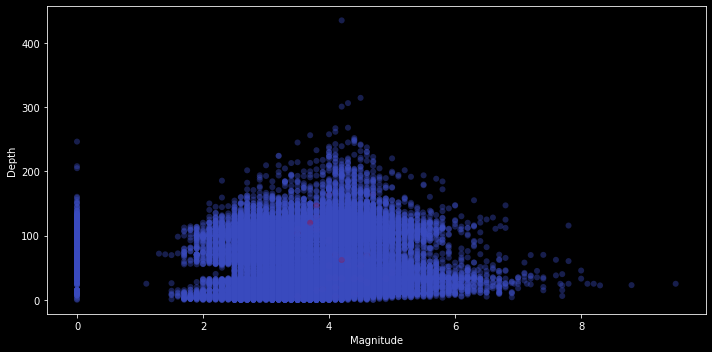

In [231]:
# We plot the distribution into a Magnitude - Depth graph

import matplotlib.pyplot as plt
from matplotlib import cm

from matplotlib import style
style.use ('dark_background')

plt.figure(figsize = (10,5))
plt.scatter(preprocessing_df['mag'], preprocessing_df['depth'], c = preprocessing_df['triggered_eruption'], alpha = 0.4, lw = 0, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.tight_layout()
plt.show()

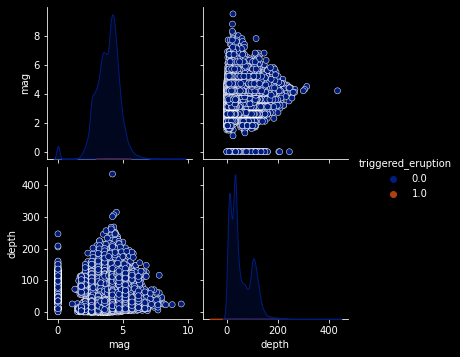

In [232]:
# And a pairplot:

import seaborn as sns

sns.pairplot(preprocessing_df, hue='triggered_eruption', palette='dark')

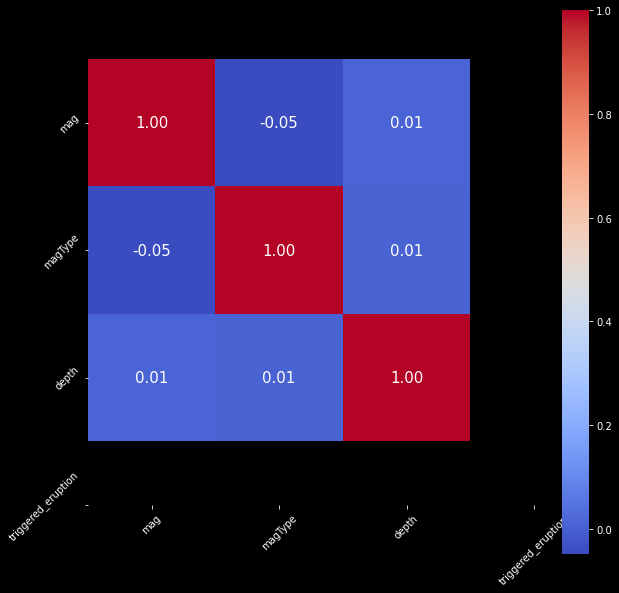

In [233]:
corr = preprocessing_df.corr('pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= preprocessing_df.columns, 
           yticklabels= preprocessing_df.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Before balancing the dataset we will encode the 'magType' column, converting all the string values into something the ML model can operate. We will use OneHotEncoder to create columns of every unique string value. 

In [234]:
# We first divide the dataset into the features and the target:

X = preprocessing_df.drop(columns=['triggered_eruption'], axis=1)

y = preprocessing_df['triggered_eruption']

In [235]:
X_dummies = pd.get_dummies(preprocessing_df.magType)

X_test = pd.concat([preprocessing_df, X_dummies], axis=1)

X_test = X_test.drop(columns=['magType'], axis=1)

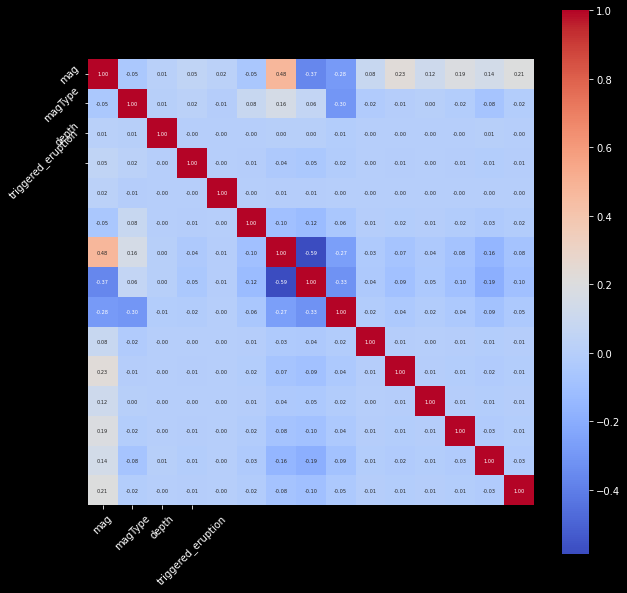

In [236]:
corr = X_test.corr('pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 5},
           xticklabels= preprocessing_df.columns, 
           yticklabels= preprocessing_df.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [237]:
from sklearn.preprocessing import OneHotEncoder


encoder = sklearn.preprocessing.OneHotEncoder(categories='auto', handle_unknown='error')

encoder.fit (X[['magType']])


OneHotEncoder()

In [238]:
encoder.categories_

[array(['Mb', 'Mw', 'm', 'mb', 'md', 'ml', 'ms', 'mw', 'mwb', 'mwc', 'mwr',
        'mww', None], dtype=object)]

In [239]:
# We create an array with the encoder columns and the original columns

from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((encoder, ['magType']), remainder='passthrough')

In [240]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['magType'])])

In [241]:
X = column_trans.fit_transform(X).toarray()

In [242]:
X

array([[  0. ,   0. ,   0. , ...,   1. ,   0. ,  97.4],
       [  0. ,   0. ,   0. , ...,   1. ,   0. , 145. ],
       [  0. ,   0. ,   0. , ...,   1. ,   0. , 102.8],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   6.7,  29. ],
       [  0. ,   0. ,   0. , ...,   0. ,   7.2,  24. ],
       [  0. ,   0. ,   0. , ...,   0. ,   7.7,  22.4]])

Having finished the encoding, we procede with the scaling of the dataset.

In [243]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

Now we split the dataset into to subsets: train and test.

In [247]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, stratify= y, random_state=12)

Our last step is to balance the train subset.

In [248]:
y_train.sum()*100/y_train.__len__()

0.07337526205450734

We only have 0,073% of cases where an eruption was triggered. This is an extremely unbalanced dataset. Due to the small amount of positive values, we are going to use an oversampling technique where we multiply the positive eruption cases until we get a perfecly balanced dataset.  

We will use two different methods for upsampling, both of the imblearn library: 

- Random upsampling. Multiplies randomly the positive values we already have.
- SMOPE (Synthetic Minority Oversampling Technique). Creates new neighbors of the positive samples.

We will later analyse which technique presents better results.

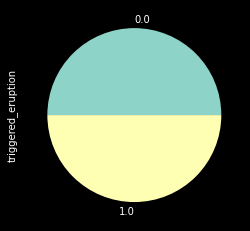

In [249]:
# We will start with the random upsampling.

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1)
X_ros_train , y_ros_train = ros.fit_resample(X_train, y_train)

ax = y_ros_train.value_counts().plot.pie()

<AxesSubplot:ylabel='triggered_eruption'>

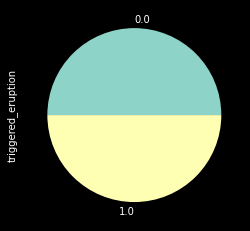

In [250]:
# The other kind of oversampling is SMOPE:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)

X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

y_smote_train.value_counts().plot.pie()

In [251]:
print (y_ros_train.value_counts(), y_smote_train.value_counts())

0.0    28599
1.0    28599
Name: triggered_eruption, dtype: int64 0.0    28599
1.0    28599
Name: triggered_eruption, dtype: int64


Now that we have completed the preprocessing of the data, we can continue with the development of the ML models.

# Machine Learning Models

We will implement different ML models in order to see which one performs better. This models will be compared with two benchmark model, which will be two fully positive and negative target results.

In [252]:
# We generate a model that will only predict positive triggered eruptions (=0)

import sklearn.metrics as metrics

y_zeros = np.zeros(y_test.shape)
accuracy_zeros = metrics.accuracy_score(y_test,y_zeros)
print(accuracy_zeros)

0.9992662644708952


## Logistic regresion

This will be our most basic model, taking into acount only one feature: the seism magnitude.  


In [253]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [254]:
# We train the model

LR_ros = LR.fit(X_ros_train, y_ros_train)

LR_smote = LR.fit(X_smote_train, y_smote_train)


In [255]:
# We predict with our trained model:

y_pred_ros = LR.predict(X_test)

y_pred_smote = LR.predict(X_test)

ValueError: x and y must be the same size

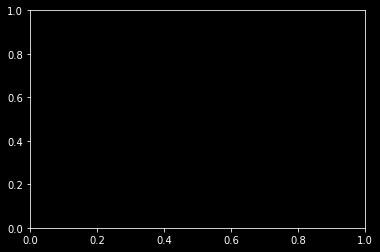

In [257]:
# We plot the results of the prediction

plt.scatter(X_test, y_pred_ros, c= y_pred_ros, alpha = 0.5, lw = 0.5)
#plt.scatter(X_test, y_pred_smote,c=y_pred_smote, alpha = 0.1, lw = 0.5)


plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

We will evaluate the predictions of the Random Over Sampling dataset: 

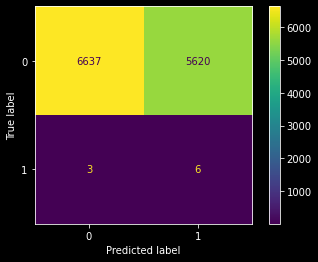

In [259]:
# Confusion matrix:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


matrix = confusion_matrix(y_test, y_pred_ros)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [260]:
# Accuracy:

from sklearn.metrics import accuracy_score

recall = accuracy_score(y_test, y_pred_ros)
print('Recall: ' + str(recall))


# Precision:

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_ros)
print ('Precision: ' + str(precision))

Recall: 0.5415783466492744
Precision: 0.001066477070742979


We will do the same with the SMOTE dataset:

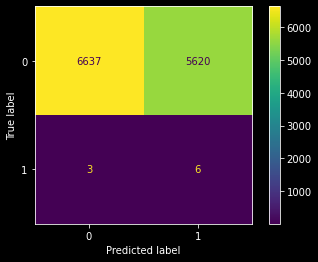

In [261]:
# Confusion matrix:

matrix = confusion_matrix(y_test, y_pred_smote)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [262]:
# Accuracy:

recall = accuracy_score(y_test, y_pred_smote)
print('Recall: ' + str(recall))


# Precision:

precision = precision_score(y_test, y_pred_smote)
print ('Precision: ' + str(precision))

Recall: 0.5415783466492744
Precision: 0.001066477070742979


We got a slight improvement using SMOTE. We will continue the process with other models. 

# Random Forest

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model

We will first work with the Random oversampled train dataset

In [270]:
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 12)
randf_ros = randf.fit(X_ros_train,y_ros_train)


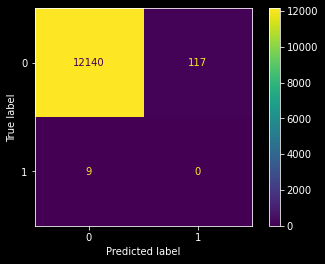

Train Accuracy: 0.9955942515472569
Train Precission: 0.9912654674014766
Test Accuracy: 0.9897277025925322
Test Precission: 0.0


In [275]:
y_ros_train_pred = randf.predict(X_ros_train)
y_test_pred = randf.predict(X_test)

matrix = confusion_matrix(y_test, y_test_pred)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

print('Train Accuracy: ' + str(metrics.accuracy_score(y_ros_train, y_ros_train_pred)))
print('Train Precission: ' + str(precision_score(y_ros_train, y_ros_train_pred)))
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, y_test_pred)))
print('Test Precission: ' + str(precision_score(y_test, y_test_pred)))

And with the SMOTE train subset:

In [276]:
randf_smote = randf.fit(X_smote_train, y_smote_train)

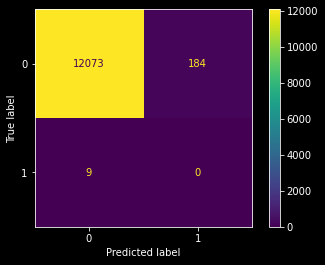

Train Accuracy: 0.9997552361970699
Train Precission: 0.9999300430235405
Test Accuracy: 0.9842654492091961
Test Precission: 0.0


In [278]:
y_smote_train_pred = randf_smote.predict(X_smote_train)
y_test_pred = randf_smote.predict(X_test)

matrix = confusion_matrix(y_test, y_test_pred)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

print('Train Accuracy: ' + str(metrics.accuracy_score(y_smote_train, y_smote_train_pred)))
print('Train Precission: ' + str(precision_score(y_smote_train, y_smote_train_pred)))
print('Test Accuracy: ' + str(metrics.accuracy_score(y_test, y_test_pred)))
print('Test Precission: ' + str(precision_score(y_test, y_test_pred)))